# 1. Tensorflow basics

In [45]:
import tensorflow as tf
import numpy as np
import gym
import random
from collections import deque
import matplotlib.pyplot as plt

%matplotlib inline


#### In Tensorflow the computation graph has to be constructed before the actual computation can take place

In [2]:
# Hello world! in Tensorflow
hello = tf.constant('Hello world!')

In [3]:
# start a Tensorflow session
session = tf.Session()

In [4]:
# run the graph we just built
# .decode() interprets the bytestring coming from tensorflow
print(session.run(hello).decode())

Hello world!


In [5]:
# Basic constant operations
# The value returned by the constructor represents the output
# of the Constant op
const1 = tf.constant(5)
const2 = tf.constant(10)

# Launch the default graph.
with tf.Session() as sess:
    print("Constant 1: {}".format(sess.run(const1)), "Constant 2: {}".format(sess.run(const2)))
    print("Addition result of the two constants: {}".format(sess.run(const1+const2)))
    print("Multiplication result of the two constants: {}".format(sess.run(const1*const2)))

Constant 1: 5 Constant 2: 10
Addition result of the two constants: 15
Multiplication result of the two constants: 50


In [6]:
# replace constants with variables
var1 = tf.placeholder(tf.int16)
var2 = tf.placeholder(tf.int16)

# define the addition and multiplication operations
# these operations are defined in the graph, but not yet performed
add = tf.add(var1, var2)
multiply = tf.multiply(var1, var2)

In [7]:
# To run the matmul op we call the session 'run()' method, passing 'add' or 'multiply'
# which represents the output of the op defined above.
#
# All inputs needed by the op are run automatically by the session.  They
# typically are run in parallel.
#
# The call 'run(multiply)' thus causes the execution of threes ops in the
# graph: the two variables and the multiply op.
#
# The output of the op is returned in 'addition_result' as a numpy `ndarray` object.
with tf.Session() as sess:
    print("Addition result of the two variables: {}".format(sess.run(add, feed_dict={var1:3, var2:5})))
    print("Multiplication result of the two variables: {}".format(sess.run(multiply, feed_dict={var1:3, var2:5})))



Addition result of the two variables: 8
Multiplication result of the two variables: 15


In [8]:
# Create a Constant op that produces a 1x2 matrix.  The op is
# added as a node to the default graph.
matrix1 = tf.constant([[3., 3.]])

# Create another Constant that produces a 2x1 matrix.
matrix2 = tf.constant([[2.],[2.]])

In [9]:
# Create a Matmul op that takes 'matrix1' and 'matrix2' as inputs.
# The returned value, 'product', represents the result of the matrix
# multiplication.
matrix_product = tf.matmul(matrix1, matrix2)

In [10]:
# run the graph and get the result
with tf.Session() as sess:
    result = sess.run(matrix_product)
    print("Multiplication result of the two matrices: {}".format(sess.run(matrix_product)))



Multiplication result of the two matrices: [[ 12.]]


# Implement Q-learning with a table

In [11]:
env = gym.make('FrozenLake-v0')

In [29]:
#Initialize table with all zeros
Q = np.zeros([env.observation_space.n,env.action_space.n])
# Set learning parameters
learn_rate = .8
gamma = .95
num_episodes = 2000
reward_list = []
for i in range(num_episodes):
    #Reset environment and get first new observation
    state = env.reset()
    reward_epoch = 0
    done = False
    ep_length = 0
    #The Q-Table learning algorithm
    while ep_length < 99:
        ep_length += 1
        #Choose an action by greedily (with noise) picking from Q table
        action = np.argmax(Q[state,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))
        #Get new state and reward from environment
        new_state, reward, done,_ = env.step(action)
        #Update Q-Table with new knowledge
        Q[state,action] = Q[state,action] + learn_rate*(reward +
                                                        gamma*np.max(Q[new_state,:]) - Q[state,action])
        reward_epoch += reward
        state = new_state
        if done == True:
            break
    reward_list.append(reward_epoch)

In [30]:
print("Score over time: " +  str(sum(reward_list)/num_episodes))
print("Final Q-Table Values", Q)

Score over time: 0.421
Final Q-Table Values [[  2.37457982e-01   3.52472482e-03   3.54791125e-03   5.30445001e-03]
 [  1.04265981e-05   5.42057100e-04   9.35469394e-05   1.86504535e-01]
 [  5.28666721e-03   2.82018444e-03   3.55754576e-03   1.84692923e-01]
 [  5.37791960e-04   9.82726395e-04   3.27262786e-05   7.20178745e-02]
 [  3.70764163e-01   6.14982445e-04   1.95538061e-04   1.11727184e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  8.96517825e-03   2.96421132e-05   1.17340811e-04   1.71427181e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  1.68669112e-03   1.36589976e-04   6.25918424e-06   6.52281499e-01]
 [  1.21789556e-03   3.17251534e-01   3.12622018e-03   1.53672862e-03]
 [  7.82383496e-02   0.00000000e+00   8.10360011e-04   5.77768872e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.99899287e-

In [31]:
print(len(reward_list))

2000


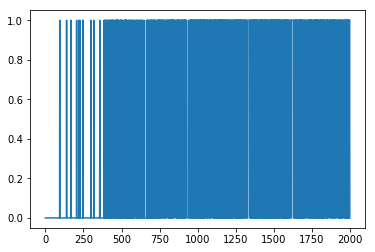

In [32]:
plt.plot(reward_list)

# Implement Q-learning with a neural network

In [25]:
env = gym.make('FrozenLake-v0')

In [26]:
tf.reset_default_graph()

In [27]:
#These lines establish the feed-forward part of the network used to choose actions
inputs = tf.placeholder(shape=[1,16],dtype=tf.float32)
W = tf.Variable(tf.random_uniform([16,4],0,0.01))
Qout = tf.matmul(inputs, W)
predict = tf.argmax(Qout, 1)

#Below we obtain the loss by taking the sum of squares difference between the target and prediction Q values.
nextQ = tf.placeholder(shape=[1,4], dtype=tf.float32)
loss = tf.reduce_sum(tf.square(nextQ - Qout))
trainer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
updateModel = trainer.minimize(loss)

In [37]:
init = tf.initialize_all_variables()

# Set learning parameters
gamma = .99
epsilon = 0.1
num_episodes = 2000
#create lists to contain total rewards and steps per episode
step_list = []
reward_list = []
with tf.Session() as sess:
    sess.run(init)
    for i in range(num_episodes):
        #Reset environment and get first new observation
        state = env.reset()
        reward_episode = 0
        done = False
        ep_length = 0
        #The Q-Network
        while ep_length < 99:
            ep_length+=1
            #Choose an action by greedily (with epsilon chance of random action) from the Q-network
            action, allQ = sess.run([predict, Qout], feed_dict={inputs:np.identity(16)[state:state+1]})
            if np.random.rand(1) < epsilon:
                action[0] = env.action_space.sample()
            #Get new state and reward from environment
            new_state, reward, done,_ = env.step(action[0])
            #Obtain the Q' values by feeding the new state through our network
            Q1 = sess.run(Qout,feed_dict={inputs:np.identity(16)[new_state:new_state+1]})
            #Obtain maxQ' and set our target value for chosen action.
            maxQ1 = np.max(Q1)
            targetQ = allQ
            targetQ[0, action[0]] = reward + gamma*maxQ1
            #Train our network using target and predicted Q values
            _,W1 = sess.run([updateModel,W],feed_dict={inputs:np.identity(16)[state:state+1],nextQ:targetQ})
            reward_episode += reward
            state = new_state
            if done == True:
                #Reduce chance of random action as we train the model.
                epsilon = 1./((i/50) + 10)
                break
        step_list.append(ep_length)
        reward_list.append(reward_episode)
print("Percent of succesful episodes: {}%".format(str(sum(reward_list)/num_episodes)))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Percent of succesful episodes: 0.0985%


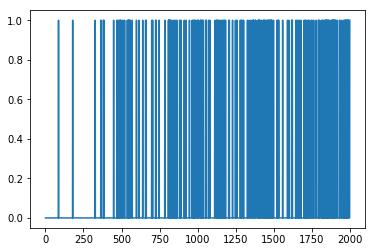

In [39]:
plt.plot(reward_list)

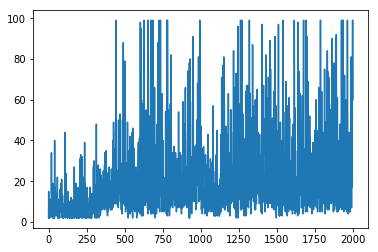

In [40]:
plt.plot(step_list)

# Solving CartPole with DQN 

In [1]:
class Network:
    """
    Build the network that calculates the Q-values
    """
    
    def __init__(self):
        pass

In [2]:
class ExperienceReplay: 
    """
    Store experiences and use them for training
    """
    def __init__(self):
        pass

In [68]:
class Agent:
    """
    Build the agent that learns to solve the problem
    """
    def __init__(self, stateCnt, actionCnt):
        pass
        
    def train(self):
        pass

In [70]:
class Environment:
    """
    Build the environment in which the agent performs
    """
    def __init__(self):
        pass

In [ ]:
MEMORY_CAPACITY = 100000
BATCH_SIZE = 64

GAMMA = 0.99

MAX_EPSILON = 1
MIN_EPSILON = 0.01
LAMBDA = 0.001 

PROBLEM = 'CartPole-v0'
env = Environment(PROBLEM)

state_shape  = env.env.observation_space.shape[0]
action_shape = env.env.action_space.n

agent = Agent(state_shape, action_shape)

while True:
    agent.train(agent)
